# DMC - Python for Analytics - Sesión 05
Profesor: Manuel Montoya | Data Scientist @ Belcorp

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Clasificación con métodos de árboles

In [2]:
import random
random.seed(2020)

In [3]:
import os
import pandas
import numpy

import seaborn
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,  f1_score, roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Red Wine Quality Dataset https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

In [4]:
path_base = "/content/drive/My Drive/python-for-analytics/sesion-05/data"
os.listdir(path_base)

['winequality-red.csv',
 'german_credit_data.csv',
 'titanic_train.csv',
 'decision_tree_default.dot']

In [5]:
df_wine = pandas.read_csv(f"{path_base}/winequality-red.csv")
df_wine.shape

(1599, 12)

In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df_wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
df_wine["quality_categorical"] = df_wine["quality"].apply(lambda value: 1 if value >= 7 else 0)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Análisis descriptivo

In [11]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [12]:
df_wine["quality_categorical"].value_counts()

0    1382
1     217
Name: quality_categorical, dtype: int64

In [13]:
df_wine["quality_categorical"].value_counts() / len(df_wine)

0    0.86429
1    0.13571
Name: quality_categorical, dtype: float64

In [ ]:
# _ = df_wine.hist(figsize= (10,10))

In [ ]:
# _ = df_wine.boxplot(figsize= (20,10))

In [ ]:
# columns_boxplot = [column for column in df_wine.columns if column not in ["free sulfur dioxide", "total sulfur dioxide"]]

# _ = df_wine[columns_boxplot].boxplot(figsize= (20,10))

In [14]:
feature_columns = [column for column in df_wine.columns if column not in ["quality", "quality_categorical"]]
feature_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [15]:
df_features = df_wine[feature_columns]
# target_continuous = df_wine["quality"]
target_categorical = df_wine["quality_categorical"]

In [16]:
df_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
df_features.shape, target_categorical.shape

((1599, 11), (1599,))

# Árboles de Decisión (Decision Tree)

Documentación https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target_categorical, test_size=0.20)

In [19]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [20]:
y_train.shape, y_test.shape

((1279,), (320,))

In [21]:
y_train.value_counts() / y_train.size

0    0.86552
1    0.13448
Name: quality_categorical, dtype: float64

In [23]:
y_test.value_counts() / y_test.size

0    0.859375
1    0.140625
Name: quality_categorical, dtype: float64

## Fit con parámetros por defecto

In [24]:
tree_model = DecisionTreeClassifier()
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
prediction_train = tree_model.predict(X_train)
prediction_test = tree_model.predict(X_test)

In [27]:
prediction_test

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [30]:
prediction_test_proba = tree_model.predict_proba(X_test)[:,1]
prediction_test_proba.shape

(320,)

In [31]:
accuracy_score(y_train, prediction_train)

1.0

In [32]:
accuracy_score(y_test, prediction_test)

0.8625

In [33]:
confusion_matrix(y_test, prediction_test)

array([[247,  28],
       [ 16,  29]])

In [34]:
cf_values = confusion_matrix(y_test, prediction_test)
pandas.DataFrame(cf_values, index = ["True Bad", "True Good"], columns = ["Predicted Bad", "Predicted Good"])

,Predicted Bad,Predicted Good
True Bad,247,28
True Good,16,29


In [35]:
precision_score(y_test, prediction_test)

0.5087719298245614

In [36]:
recall_score(y_test, prediction_test)

0.6444444444444445

In [37]:
f1_score(y_test, prediction_test)

0.5686274509803921

In [38]:
roc_auc_score(y_test, prediction_test_proba)

0.7713131313131313

In [ ]:
tree.export_graphviz(tree_model, out_file=f"{path_base}/decision_tree_default.dot", 
                                 feature_names=df_features.columns,
                                 class_names=["Bad", "Good"],
                                 filled=True, rounded=True,  
                                 special_characters=True)  

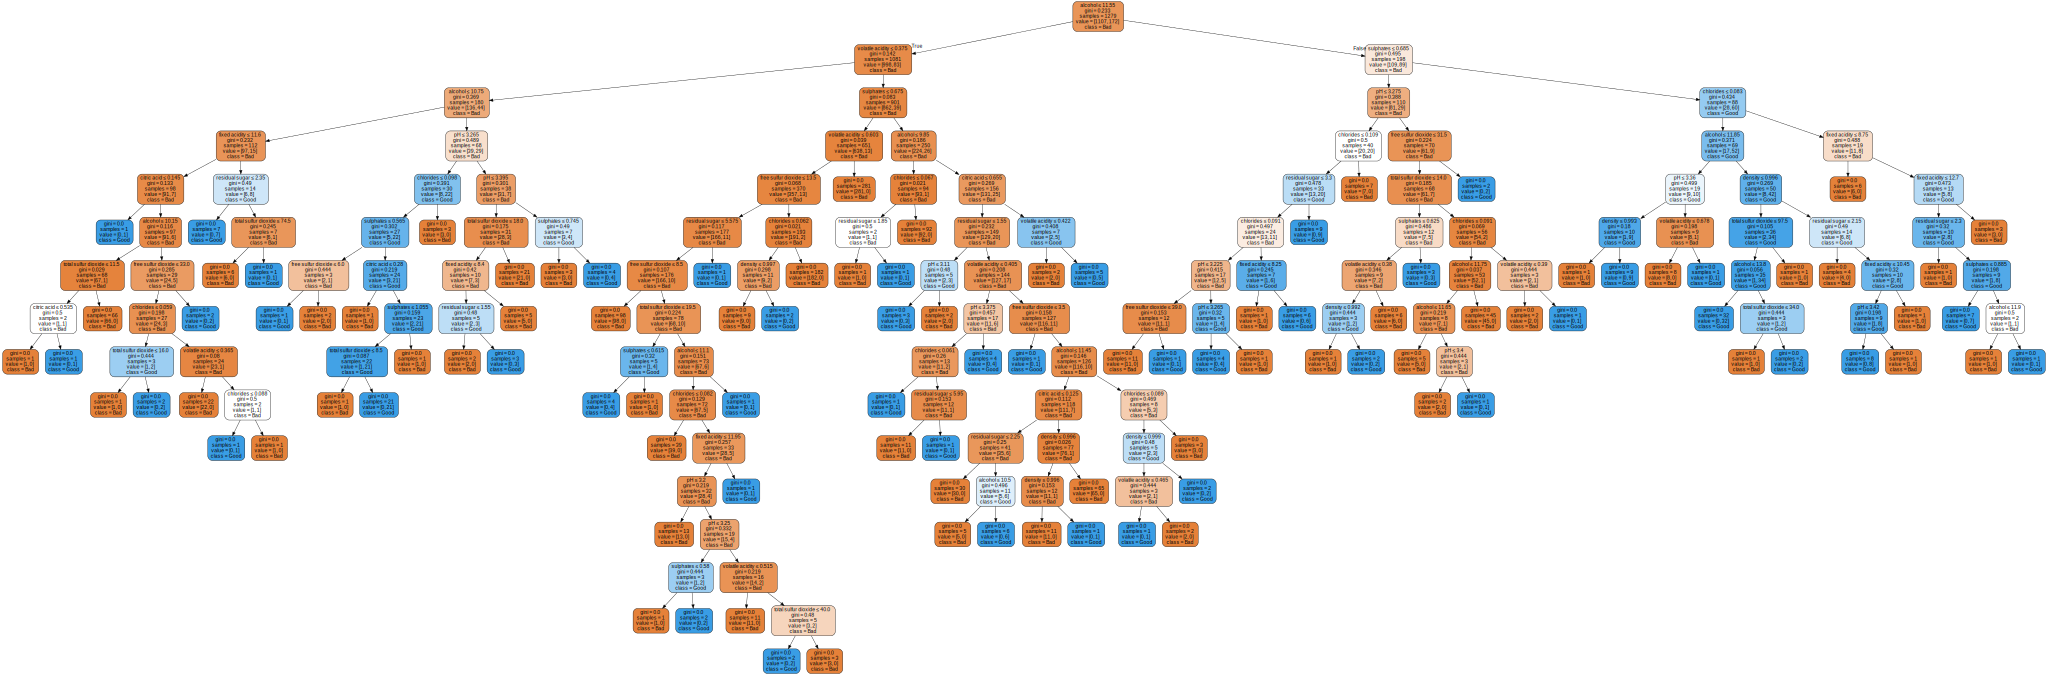

In [39]:
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                 feature_names=df_features.columns,
                                 class_names=["Bad", "Good"],
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Grid Search

In [40]:
tree_model_cv = DecisionTreeClassifier()
tree_model_cv

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
parameters = {'criterion':['gini', 'entropy'], 
              'splitter': ['best', 'random'],
              'max_depth': range(3, 18, 3),
              'min_samples_split': [5, 10, 25, 50, 100, 200]}

clf = GridSearchCV(tree_model_cv, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [42]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 5,
 'splitter': 'best'}

In [43]:
clf.best_score_

0.8881893382352942

In [44]:
best_tree = clf.best_estimator_
best_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
resultados_cv = pandas.DataFrame(clf.cv_results_)
resultados_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004702,0.001957,0.000974,0.000140,gini,3,5,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.851562,0.867188,0.886719,0.890625,0.886275,0.876474,0.014887,21
1,0.001995,0.000084,0.000840,0.000027,gini,3,5,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.859375,0.875000,0.859375,0.875000,0.866667,0.867083,0.006991,69
2,0.003673,0.000034,0.000968,0.000109,gini,3,10,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.851562,0.867188,0.886719,0.890625,0.886275,0.876474,0.014887,21
3,0.002172,0.000276,0.000875,0.000083,gini,3,10,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.863281,0.871094,0.867188,0.867188,0.870588,0.867868,0.002820,66
4,0.003588,0.000016,0.000835,0.000008,gini,3,25,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.851562,0.867188,0.886719,0.890625,0.886275,0.876474,0.014887,21


In [46]:
resultados_cv.sort_values(by = "mean_test_score", ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.005599,0.000174,0.000995,0.000072,gini,6,5,best,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.859375,0.882812,0.894531,0.921875,0.882353,0.888189,0.020338,1
8,0.003716,0.000056,0.000868,0.000047,gini,3,100,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.867188,0.878906,0.882812,0.914062,0.886275,0.885849,0.015504,2
32,0.005163,0.000406,0.000972,0.000076,gini,9,100,best,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.867188,0.871094,0.882812,0.914062,0.886275,0.884286,0.016487,3
44,0.005051,0.000313,0.000909,0.000015,gini,12,100,best,"{'criterion': 'gini', 'max_depth': 12, 'min_sa...",0.867188,0.871094,0.882812,0.914062,0.886275,0.884286,0.016487,3
20,0.004897,0.000228,0.000949,0.000035,gini,6,100,best,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.867188,0.871094,0.882812,0.914062,0.886275,0.884286,0.016487,3


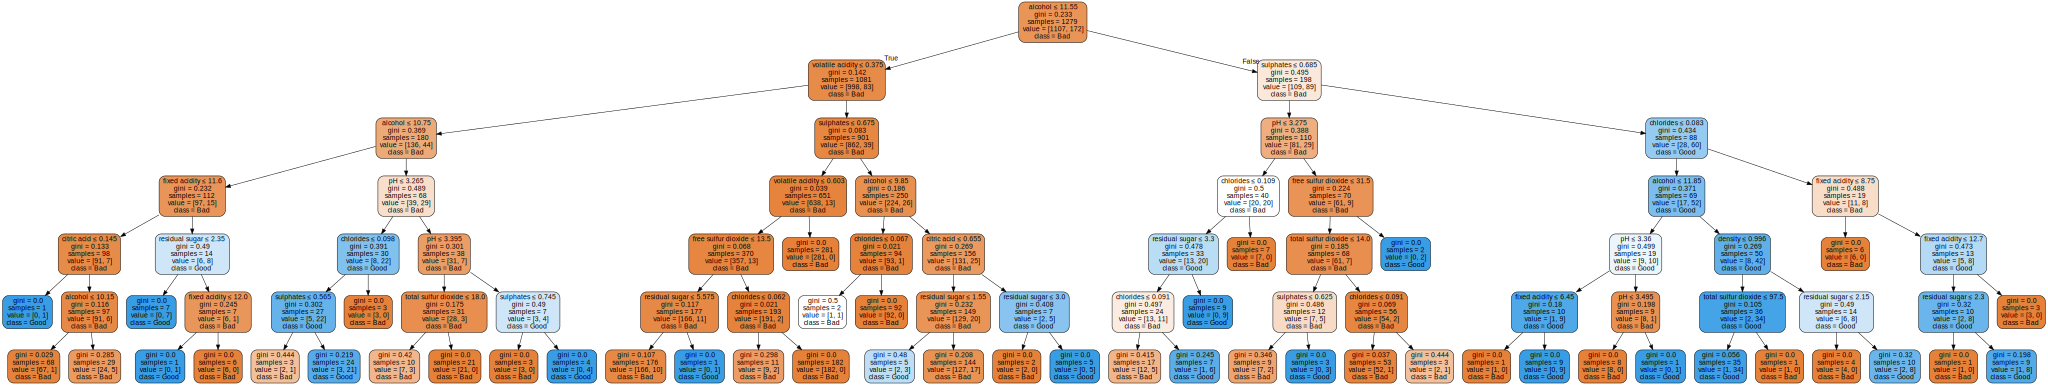

In [47]:
dot_data = tree.export_graphviz(best_tree, out_file=None, 
                                 feature_names=df_features.columns,
                                 class_names=["Bad", "Good"],
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [48]:
accuracy_score(y_test, best_tree.predict(X_test))

0.890625

In [49]:
cf_values = confusion_matrix(y_test, best_tree.predict(X_test))
pandas.DataFrame(cf_values, index = ["True Bad", "True Good"], columns = ["Predicted Bad", "Predicted Good"])

,Predicted Bad,Predicted Good
True Bad,260,15
True Good,20,25


In [50]:
best_tree.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.02857143, 0.97142857],
       [0.98529412, 0.01470588],
       [0.        , 1.        ],
       [0.82758621, 0.17241379],
       [0.94318182, 0.05681818],
       [1.        , 0.        ],
       [0.94318182, 0.05681818],
       [0.94318182, 0.05681818],
       [0.70588235, 0.29411765],
       [1.        , 0.        ],
       [0.94318182, 0.05681818],
       [0.88194444, 0.11805556],
       [0.94318182, 0.05681818],
       [0.88194444, 0.11805556],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.70588235, 0.29411765],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88194444, 0.11805556],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [51]:
roc_auc_score(y_test, best_tree.predict_proba(X_test)[:,1])

0.8213737373737375

# Bosques Aleatorios (Random Forest)

In [52]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
prediction_test = random_forest.predict_proba(X_test)

In [54]:
roc_auc_score(y_test, prediction_test[:,1])

0.920969696969697

In [ ]:
clf = GridSearchCV(random_forest, param_grid = {'n_estimators' : range(10, 420, 20), 
                                                'n_jobs' : [-1],
                                                'min_samples_split': [5, 10, 25, 50, 100, 200]})
clf.fit(X_train, y_train)

In [ ]:
best_tree = clf.best_estimator_
prediction_test = best_tree.predict_proba(X_test)
roc_auc_score(y_test, prediction_test[:,1])

In [ ]:
best_tree.get_params()